# 1813. Sentence Similarity III

### Difficulty: <font color = orange> Medium </font>
---
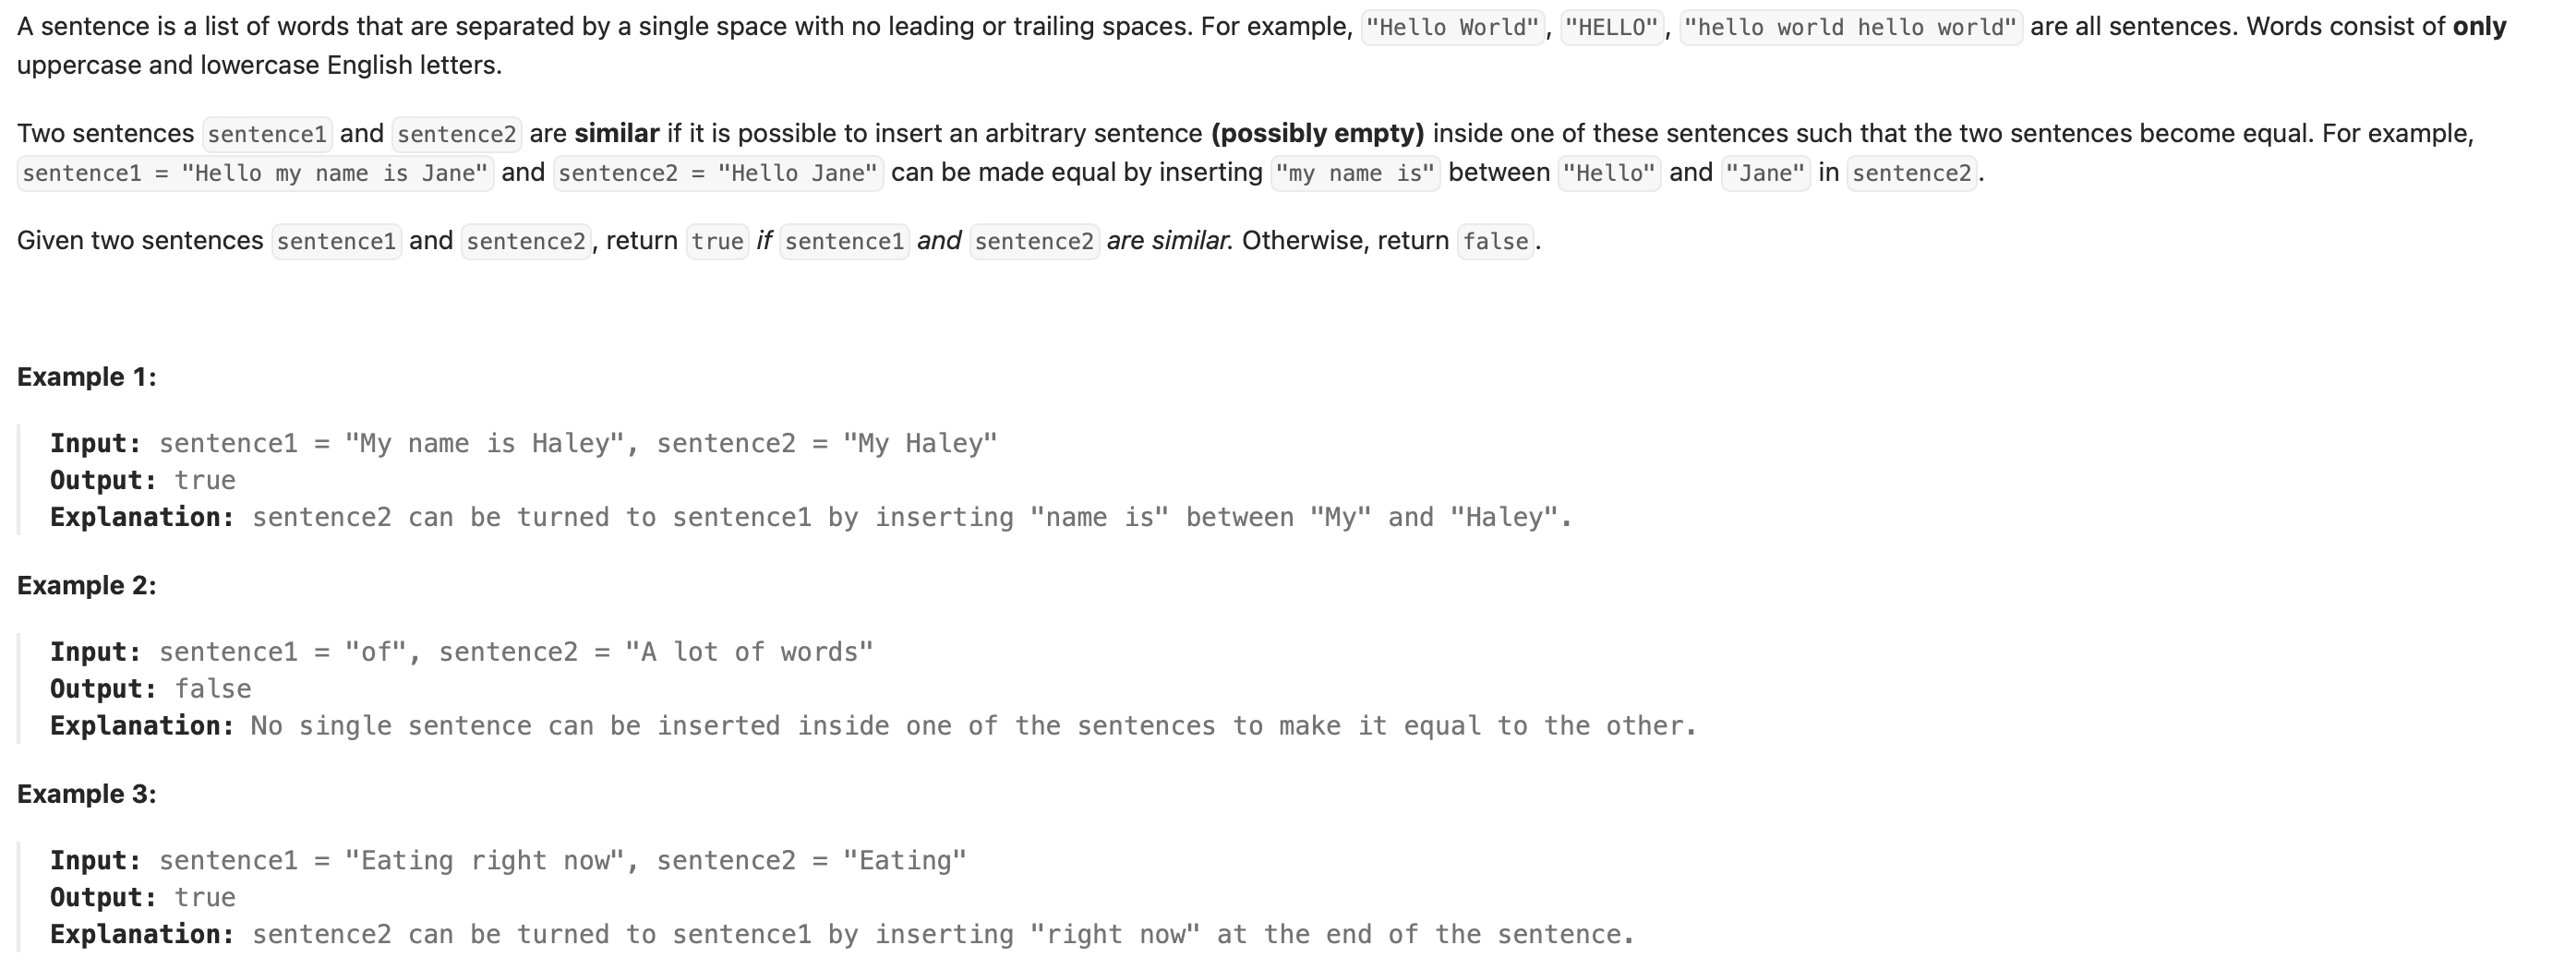

## Approach Overview:

Iterate through the words in `sentence1` and `sentence2` from both ends and count how many matching words we find. 

If the sentences are similar (i.e. one can be turned into the other) then the number of matching words should equal or exceed the number of words in the shortest sentence.

## Detailed Explanation:

This was an interesting one. 

The core insight here is that if two sentences are indeed similar, meaning if we take only one portion from one and insert it into the other one such that they become identical, then one key criteria needs to be satisfied.

What's the criteria you ask? How can I know if two sentences are similar?

Simple, we only need to pay attention to the number of matching words between them. 

If the shortest sentence has all the words as the longest one in the same positions / order, then we can take a portion out of the longest one and insert it into the shortest such that they become the same.

For example:

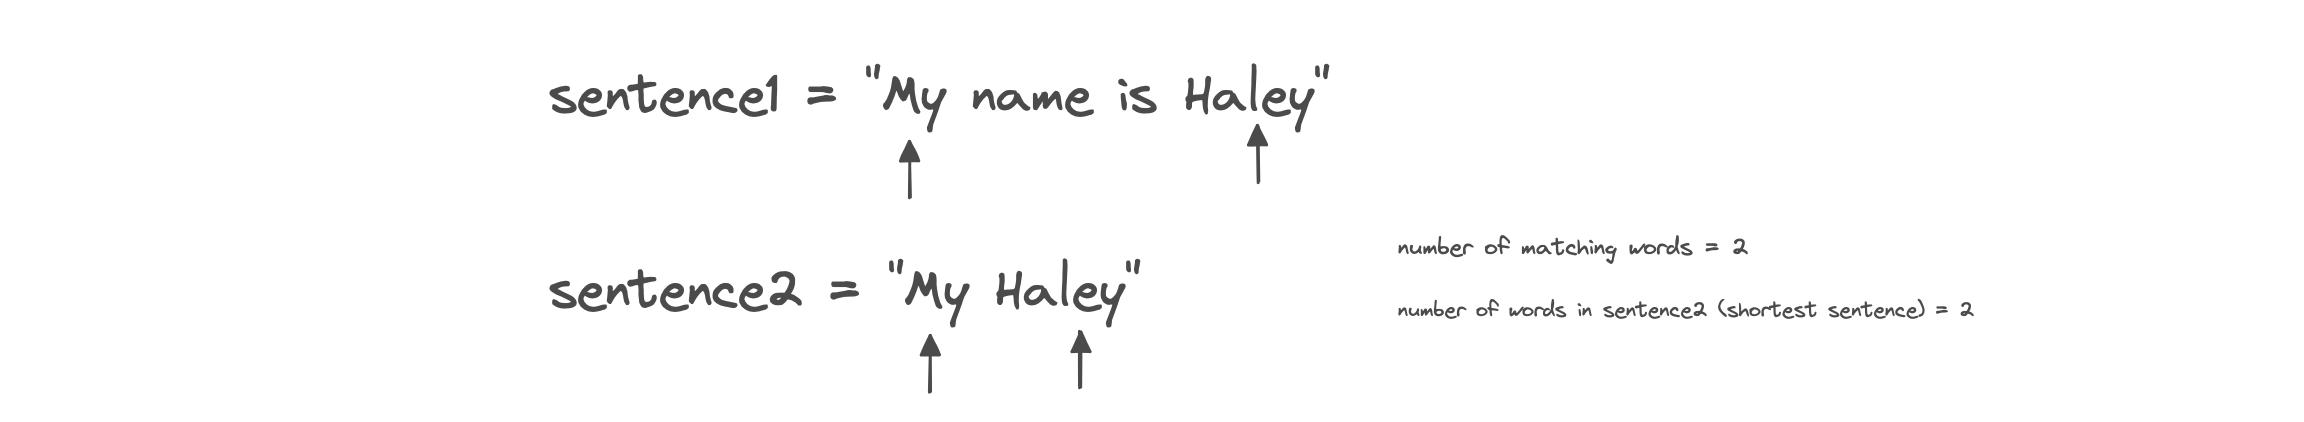


Notice that both sentences are similar only because the **number of matching words** between them, notice all the words in the shortest sentence also appears in the same positions as the longest one. 

In mathematical terms two sentences are similar if **the number of matching words between them = the number of word in the shortest sentence**.

How do we solve for this algorithmically?

Okay so firstly we need to split both sentences into a list of words so we can easily loop through them and count the number of matching words between them. 

**N.B: We need to ensure we're checking for matching words between sentences in the same order (from left to right and right to left)**


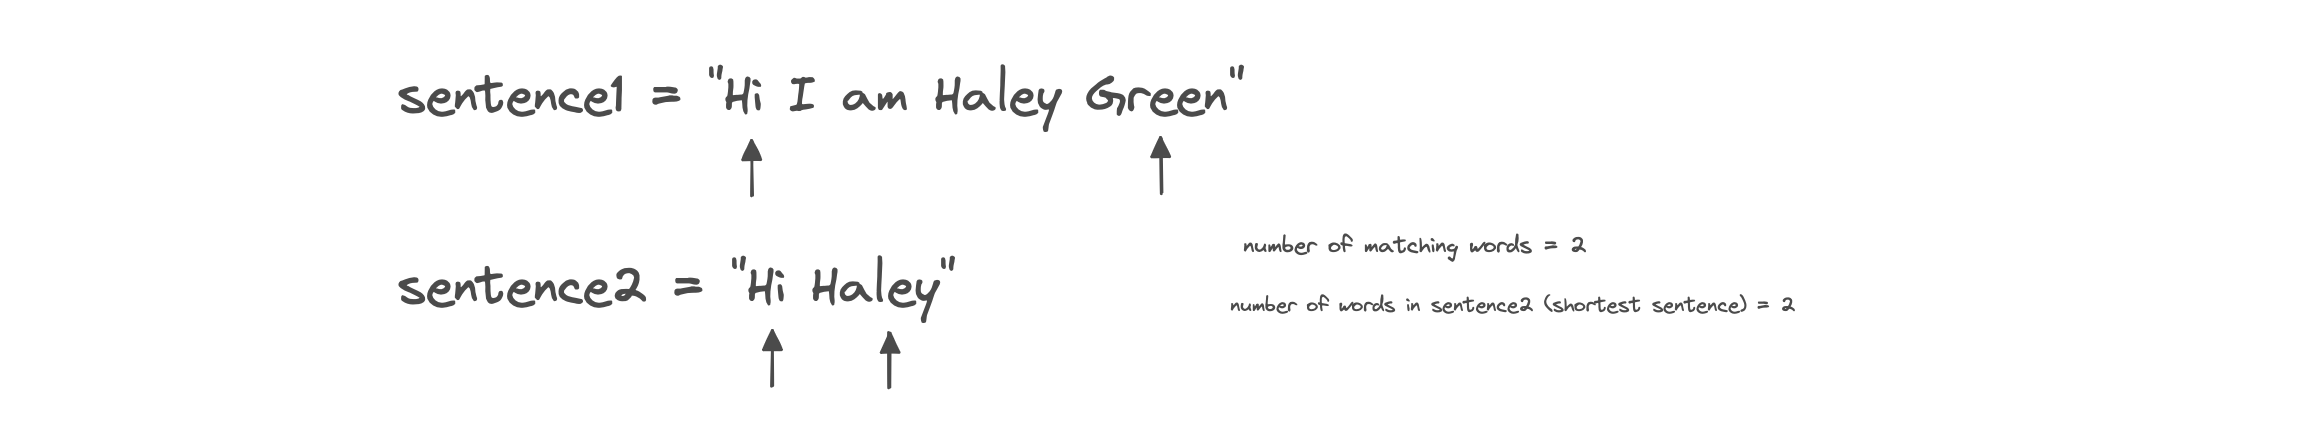

Notice in the above example even though the number of matching words criterion holds the two sentences are still not similar simply because the matching words don't appear in the same order. So it's crucial they not only match but match in the same order.

Okay now to implement this strategy. 

Firstly we need to split both *(string-based)* sentences into an array of words. This makes it super easy to scan and parse through the **words** in both sentences.

Secondly we scan through both sentences and check and count in the forward direction (from start of sentence to finish / from left to right) for matching words. We terminate the loop once find a mismatch.

Thirdly we scan through both sentences and check and count in the reverse direction (from end to start of sentences / right to left) for matching words. Again we terminate the loop if a mismatch is found.

Finally we check if the sentences are similar, i.e if **the number of matching words >= number of words in the shortest sentence**.

## Key Challenges:

In [ ]:
class Solution:
    def areSentencesSimilar(self, sentence1: str, sentence2: str) -> bool:   
        
        # split sentence1 into an array of words
        sentence1 = sentence1.split()

        # split sentence2 into an array of words
        sentence2 = sentence2.split()
        
        # initialize left pointer (to the position of the first word in both sentences)
        left = 0

        # initialize right pointers (right_s1 & right_s2) to point to the position of the last word in both sentences
        right_s1 = len(sentence1) - 1
        right_s2 = len(sentence2) - 1
        
        # initialize matchingWords (it'll keep count of number of matching words in sentence1 & sentence2)
        matchingWords = 0

        # loop as long as we haven't exceeded the bounds of the shortest sentence 
        # AND 
        # as long as the current left word in sentence1 matches the current left word in sentence2
        while left < min(len(sentence1), len(sentence2)) and sentence1[left] == sentence2[left]:
            
            # increment matchingWords (because we've found a pair of matching words in s1 & s2)
            matchingWords += 1 
            # increment left pointer (to look at next word in sentence1 and sentence2)        
            left += 1   
        
        # loop as long as we havn't exceded the bounds of the shortest sentence
        # AND
        # as long as the current right word in sentence1 matches the current right word in sentence2 
        while min(len(sentence1), len(sentence2)) >= 0 and sentence1[right_s1] == sentence2[right_s2]:
           
            # increment matchingWords (because we've found a pair of matching words in s1 & s2)
            matchingWords += 1
            # decrement right_s1 & right_s2 (to look at next words in sentence1 and sentence2)
            right_s1 -= 1   
            right_s2 -= 1   
        
        # check if the number of matching words is >= the number of words in the shortest sentence
        if matchingWords >= min(len(sentence1), len(sentence2)): 
            # return True
            return True
        
        # else return False
        return False    